In [1]:
# Let's go the directory of the Gap Framework"
import os

%ls

LICENSE*      flower.jpg*      report.ipynb*       tests/
README.md*    flower2.h5*      requirements.txt*   tools/
__pycache__/  flower2.jpg*     sessionHeck.ipynb*  train/
build/        flower_photos/   setup.py*           tutorial.ipynb*
dist/         gapml/           site/
docs/         gapml.egg-info/  specs/
flower.h5*    mkdocs.yml*      templates/


In [2]:
# import the Gap Vision module
from gapml.vision import Image, Images

[nltk_data] Downloading package wordnet to /home/david/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/david/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
import os
#os.chdir("tut/")
%ls

LICENSE*      flower.jpg*      report.ipynb*       tests/
README.md*    flower2.h5*      requirements.txt*   tools/
__pycache__/  flower2.jpg*     sessionHeck.ipynb*  train/
build/        flower_photos/   setup.py*           tutorial.ipynb*
dist/         gapml/           site/
docs/         gapml.egg-info/  specs/
flower.h5*    mkdocs.yml*      templates/


In [4]:
planes = Images(['train/tut_files/1'], 0, config=['nostore'])
birds =  Images(['train/tut_files/2'], 1, config=['nostore'])

birds._data[0].shape
print('Number of plane images: ', len(planes))
print('Name of plane image: ', planes._data[0].name)
print('Size of plane image: ', planes._data[0].size)
print('Shape of plane image: ', planes._data[0].shape,'\n')

print('Number of bird images: ', len(birds))
print('Name of bird image: ', birds._data[0].name)
print('Size of bird image: ', birds._data[0].size)
print('Shape of bird image: ', birds._data[0].shape)

Number of plane images:  4
Name of plane image:  10_1
Size of plane image:  22041
Shape of plane image:  (399, 381, 3) 

Number of bird images:  5
Name of bird image:  0_2
Size of bird image:  29834
Shape of bird image:  (399, 381, 3)


In [5]:

images = Images(['train/tut_files/1','train/tut_files/2'], [0,1], config=['resize=(50,50)', 'nostore'], name='planes-birds')


In [14]:
images.errors

[]

In [7]:
from PIL import Image as pi
print('Shape: ', images._data[0].shape, 'Label: ', images[0].label)
print('Shape: ', images[0].shape, 'Label: ', images[0].label)
print(images.name)

Shape:  (50, 50, 3) Label:  0
Shape:  (50, 50, 3) Label:  0
planes-birds


In [8]:
images.augmentation = True

In [9]:
'''from random import randint 

images.augment = -350, 350, 3
collect = []
img = Images()
data_set = Images()

for image in range(len(images)):
    while True:
        data, label = next(images)
        if data is None: break
        pass
'''

'from random import randint \n\nimages.augment = -350, 350, 3\ncollect = []\nimg = Images()\ndata_set = Images()\n\nfor image in range(len(images)):\n    while True:\n        data, label = next(images)\n        if data is None: break\n        pass\n'

In [10]:
images.split = 0.30, 1258
print('Train count: ',len(images._train),'\n','Test count: ',len(images._test),'\n')

x_train, x_test, y_train, y_test = images.split

print("x_train", len(x_train))
print("y_train", len(y_train))
print("x_test", len(x_test))
print("y_test", len(y_test))

Train count:  6 
 Test count:  3 

x_train 6
y_train 6
x_test 3
y_test 3


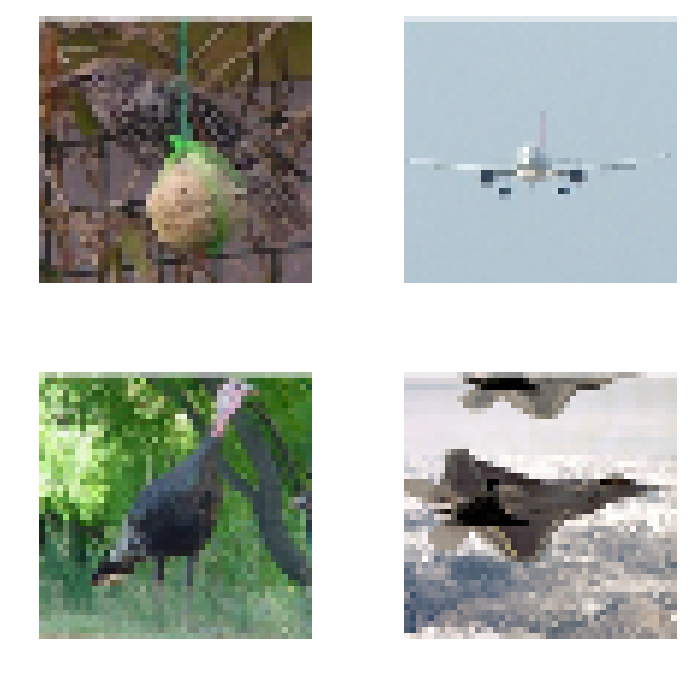

In [12]:
from matplotlib import pyplot as plt
import cv2

fig=plt.figure(figsize=(12, 12))
columns = 2
rows = 2
for i in range(1, columns*rows +1):
    img=x_train[i]
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:

# Each element in x_train list should be a numpy array
print(type(x_train[0]))
# Each element should be in the shape 50 x 50 pixels
print(x_train[0].shape)
print(x_train[2].shape)

In [ ]:
# Each elment in y_train should be the label (integer)
print(y_train[0])
print(y_train[2])

In [ ]:
'''
import h5py
hp = h5py.File('planes-birds.h5', 'r')
hp.close()
'''

In [ ]:
'''
hf = h5py.File('planes-birds.h5', 'w')
hf.create_dataset('x_train', data=x_train)
hf.create_dataset('x_test', data=x_test)
hf.create_dataset('y_train', data=y_train)
hf.create_dataset('y_test', data=y_test)
hf.close()
'''

In [ ]:
'''
hf = h5py.File('planes-birds.h5', 'r')
xtrain = hf.get('x_train')
ytrain = hf.get('y_train')
xtest = hf.get('x_test')
ytest = hf.get('y_test')
'''

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import h5py


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(399, 381, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
 
model.fit(x_train, y_train, verbose=1, epochs=20, batch_size=32, shuffle=False, validation_data=(x_test,y_test))
model.save_weights('first_try.h5') 

In [ ]:
#os.remove('planes-birds.h5')